In [2]:
import micropip
await micropip.install("seaborn")

ModuleNotFoundError: No module named 'micropip'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [113]:
df = pd.read_csv("resume_dataset_1200.csv")


In [114]:
df.head()

,Name,Age,Gender,Education_Level,Field_of_Study,Degrees,Institute_Name,Graduation_Year,Experience_Years,Current_Job_Title,Previous_Job_Titles,Skills,Certifications,Target_Job_Description
0,Akash Pillai,30,Non-Binary,Master's,Cybersecurity,Master's in Cybersecurity,University of Pennsylvania,2025,0,NaN,NaN,"Node.js, JavaScript, Deep Learning, Statistics...",Google Cloud Professional,Seeking a challenging role as a Software Devel...
1,Charlotte Taylor,27,Non-Binary,Bachelor's,Electronics Engineering,Bachelor's in Electronics Engineering,Pune University,2019,5,Cybersecurity Engineer,NaN,"Spark, Kubernetes, Terraform, Natural Language...",TensorFlow Developer Certificate,Targeting a Cybersecurity Engineer position to...
2,James Zhou,45,Male,Bachelor's,Computer Science,Bachelor's in Computer Science,Amity University,2023,2,Prompt Engineer,NaN,"Data Analysis, Node.js, Machine Learning, Linu...","Microsoft Azure Fundamentals, Cisco Certified ...",Targeting a Prompt Engineer position to utiliz...
3,Amelia Thomas,28,Male,Master's,Information Technology,Master's in Information Technology,University of Pennsylvania,2023,2,AI Engineer,NaN,"Docker, Kubernetes, Blockchain, Spark",NaN,Targeting a Data Scientist position where I ca...
4,Amanda Jain,42,Non-Binary,Master's,Electronics Engineering,Master's in Electronics Engineering,University of Toronto,2023,2,Cybersecurity Engineer,NaN,"Statistics, Blockchain, Kubernetes, Cybersecurity",NaN,Looking for an opportunity as a Prompt Enginee...


In [115]:
df.shape

(1200, 14)

In [116]:
import pandas as pd
import random


df = pd.read_csv("resume_dataset_1200.csv")

df['Label'] = "Rejected"

shortlisted_indices = random.sample(range(len(df)), 950)
df.loc[shortlisted_indices, 'Label'] = "Shortlisted"

print("Shortlisted indices:", shortlisted_indices[:10], "...")
print(df[['Name', 'Experience_Years', 'Education_Level','Skills','Target_Job_Description','Label']].head(15))
df.to_csv("charted.csv", index=False)
print("Saved as charted.csv ✅")




Shortlisted indices: [758, 354, 66, 229, 723, 371, 317, 734, 559, 1162] ...
                Name  Experience_Years Education_Level  \
0       Akash Pillai                 0        Master's   
1   Charlotte Taylor                 5      Bachelor's   
2         James Zhou                 2      Bachelor's   
3      Amelia Thomas                 2        Master's   
4        Amanda Jain                 2        Master's   
5         Sarah Nair                 0      Bachelor's   
6        Rahul Patel                 0        Master's   
7     Aisha Anderson                 7        Master's   
8    Jessica Jackson                 1      Bachelor's   
9      Jackson Patel                 6      Bachelor's   
10        Rohan Park                 0      Bachelor's   
11       Sneha Gupta                 5        Master's   
12      Aadhya White                 8     Certificate   
13    Rohan Martinez                 0             PhD   
14         Sneha Rao                 2      Bachelor's

In [117]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

df = pd.read_csv("charted.csv")

df['Label'] = df['Label'].map({"Rejected": 0, "Shortlisted": 1})

df['Text'] = df[['Skills', 'Education_Level', 'Field_of_Study',
                 'Experience_Years', 'Target_Job_Description']].astype(str).agg(' '.join, axis=1)

stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
    'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
    'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
    "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
    'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't"
}


def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['Cleaned_Text'] = df['Text'].apply(preprocess)

X_raw = df['Cleaned_Text']
y = df['Label']

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X_raw)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
joblib.dump(model, 'resume_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model + vectorizer saved ✅")


Accuracy: 0.8


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.80      1.00      0.89       192

    accuracy                           0.80       240
   macro avg       0.40      0.50      0.44       240
weighted avg       0.64      0.80      0.71       240

Model + vectorizer saved ✅


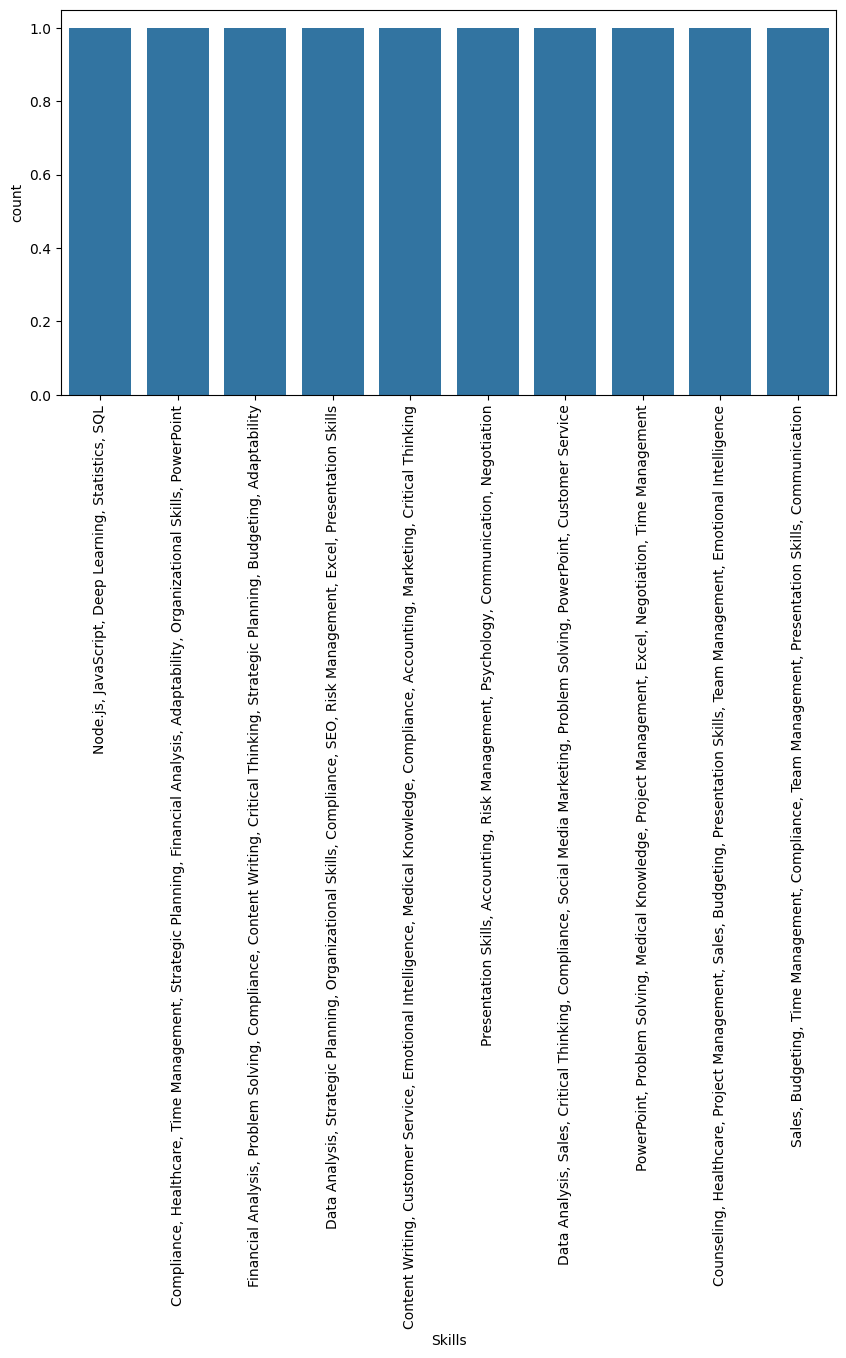

In [118]:

import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 skill categories
top_skills = df['Skills'].value_counts().nlargest(10).index

# Filter DataFrame to only include these
filtered_df = df[df['Skills'].isin(top_skills)]

# Plot
plt.figure(figsize=(10,5))
sns.countplot(x='Skills', data=filtered_df, order=top_skills)
plt.xticks(rotation=90)
plt.show()



In [119]:
df['Skills'].unique()

array(['Node.js, JavaScript, Deep Learning, Statistics, SQL',
       'Spark, Kubernetes, Terraform, Natural Language Processing',
       'Data Analysis, Node.js, Machine Learning, Linux, Jenkins, Network Security, REST APIs',
       ...,
       'Project Management, Medical Knowledge, PowerPoint, Content Writing, Quality Assurance, Social Media Marketing, Negotiation, Patient Care',
       'Emotional Intelligence, PowerPoint, Medical Knowledge, Social Media Marketing, Negotiation',
       'Presentation Skills, Critical Thinking, Time Management, PowerPoint, Organizational Skills'],
      dtype=object)

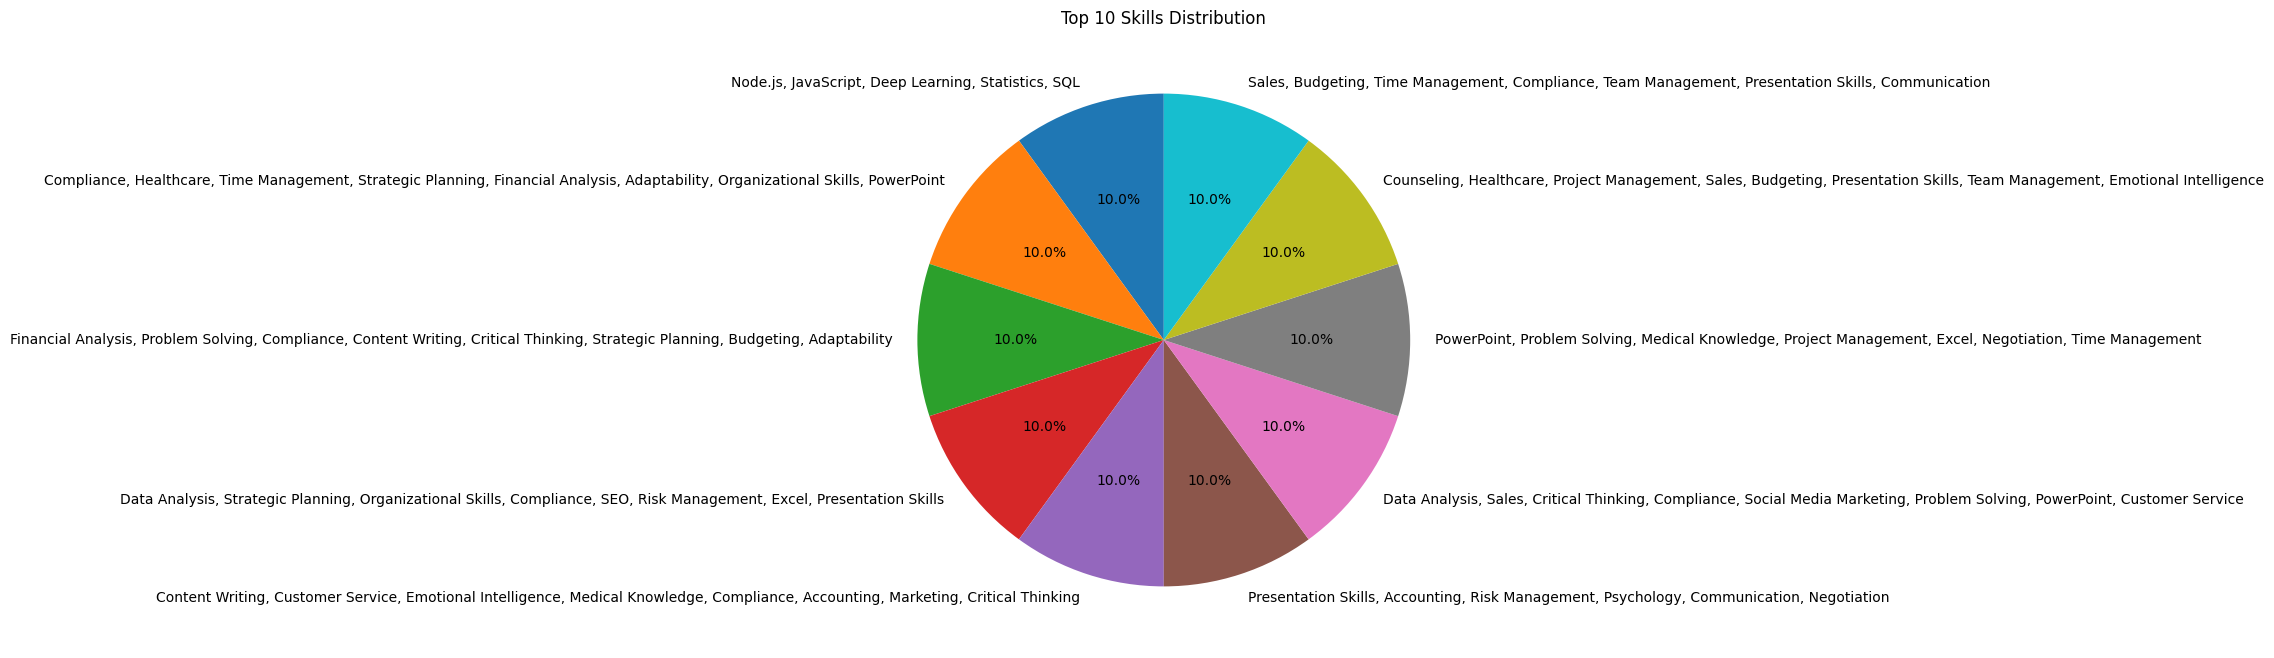

In [120]:
import matplotlib.pyplot as plt

# Get top 10 skills and their counts
top10_counts = df['Skills'].value_counts().nlargest(10)
top10_labels = top10_counts.index

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top10_counts, labels=top10_labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Skills Distribution")
plt.show()


In [121]:
df['Skills'][0]

'Node.js, JavaScript, Deep Learning, Statistics, SQL'

In [122]:
df['Target_Job_Description'][950]

'Targeting a Sales Representative position to utilize my educational background and experience to drive results and achieve career objectives.'

In [123]:

print("Original Category Distribution:")
print(df['Skills'].value_counts())
max_size = df['Skills'].value_counts().max()
balanced_df = df.groupby('Skills').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Skills'].value_counts())

Original Category Distribution:
Skills
Node.js, JavaScript, Deep Learning, Statistics, SQL                                                                                   1
Compliance, Healthcare, Time Management, Strategic Planning, Financial Analysis, Adaptability, Organizational Skills, PowerPoint      1
Financial Analysis, Problem Solving, Compliance, Content Writing, Critical Thinking, Strategic Planning, Budgeting, Adaptability      1
Data Analysis, Strategic Planning, Organizational Skills, Compliance, SEO, Risk Management, Excel, Presentation Skills                1
Content Writing, Customer Service, Emotional Intelligence, Medical Knowledge, Compliance, Accounting, Marketing, Critical Thinking    1
                                                                                                                                     ..
Kafka, PyTorch, Cloud Computing, Cybersecurity, Data Analysis, Spark                                                                  1
React, CI

<ipython-input-123-93181ae32f7b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Skills').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)



Balanced Category Distribution (After Oversampling):
Skills
Critical Thinking, Organizational Skills, Marketing, Patient Care, Quality Assurance, Strategic Planning, Budgeting, Compliance    1
AWS, Python, Git, JavaScript, SQL, Agile, Cybersecurity, Ansible                                                                   1
Project Management, Presentation Skills, Financial Analysis, Medical Knowledge                                                     1
Presentation Skills, Healthcare, Medical Knowledge, Compliance, Strategic Planning, PowerPoint                                     1
Negotiation, Excel, Adaptability, Budgeting                                                                                        1
                                                                                                                                  ..
Network Security, SQL, Solidity, PyTorch, Azure, JavaScript                                                                        1
TensorFl

In [124]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


<unknown>:3: SyntaxWarning: invalid escape sequence '\S'
<unknown>:5: SyntaxWarning: invalid escape sequence '\S'
<unknown>:6: SyntaxWarning: invalid escape sequence '\S'
<unknown>:7: SyntaxWarning: invalid escape sequence '\]'
<unknown>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<ipython-input-124-b8671de12e21>:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
<ipython-input-124-b8671de12e21>:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText

In [125]:
cleanResume("my #### $ #  #ash webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [126]:
df['Target_Job_Description'] = df['Target_Job_Description'].apply(lambda x: cleanResume(x))

In [127]:
df['Target_Job_Description'][0:950]

0      Looking for an opportunity as a Salesperson to...
1      Targeting a Counselor position to utilize my e...
2      Targeting a Digital Marketing Specialist posit...
3      Looking for a Product Manager role where I can...
4      Seeking a challenging role as a Prompt Enginee...
                             ...                        
945    Seeking a challenging role as a Operations Man...
946    Looking for an opportunity as a Mobile Applica...
947    Looking for an opportunity as a Dentist to lev...
948    Targeting a Prompt Engineer position to utiliz...
949    Looking for an opportunity as a Restaurant Spe...
Name: Target_Job_Description, Length: 950, dtype: object

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [129]:
le.fit(df['Skills'])
df['Skills'] = le.transform(df['Skills'])

In [130]:
df.Skills.unique()

array([236, 617, 825, ..., 244, 765,  68])

In [131]:
#array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
 #      'Mechanical Engineer', 'Sales', 'Health and fitness',                            # unique numbers corresponding to the categories (converts words into number)
   #    'Civil Engineer', 'Java Developer', 'Business Analyst',
   #    'SAP Developer', 'Automation Testing', 'Electrical Engineering',
      # 'Operations Manager', 'Python Developer', 'DevOps Engineer',
    #   'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
   #    'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
     # dtype=object)

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Target_Job_Description'])
requredTaxt  = tfidf.transform(df['Target_Job_Description'])

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Skills'], test_size=0.2, random_state=42)

In [135]:
X_train.shape

(960, 365)

In [136]:
X_test.shape


(240, 365)

In [137]:

text_column = None
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object':
        text_column = col
        break

if text_column is None:
    raise ValueError("No text column found in dataframe!")

print(f"Using '{text_column}' as the text column for X.")

X = df_filtered[text_column].astype(str)
y = df_filtered['Experience_Years']


Using 'Name' as the text column for X.


In [138]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

df = pd.read_csv("charted.csv")

df['Experience_Years'] = pd.to_numeric(df['Experience_Years'], errors='coerce')

df['Skills'] = df['Skills'].fillna("")

skill_counts = df['Skills'].astype(str).str.split(',').explode().str.strip().value_counts()
top_skills = skill_counts.head(100).index.tolist()

df_filtered = df[df['Skills'].astype(str).apply(
    lambda skills: any(skill.strip() in top_skills for skill in skills.split(','))
)]

df_filtered = df_filtered.dropna(subset=['Experience_Years'])


text_columns = [col for col in df_filtered.columns if df_filtered[col].dtype == 'object']
df_filtered['Combined_Text'] = df_filtered[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

X = df_filtered['Combined_Text'].astype(str)
y = df_filtered['Experience_Years']

tfidf = TfidfVectorizer(stop_words='english', max_features=100, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))





Accuracy: 0.5375


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        97
           1       0.27      0.42      0.33        33
           2       0.17      0.20      0.19        25
           3       0.23      0.26      0.24        23
           4       0.24      0.26      0.25        19
           5       0.00      0.00      0.00         9
           6       0.20      0.07      0.11        14
           7       0.00      0.00      0.00        10
           8       0.50      0.14      0.22         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1

    accuracy                           0.54       240
   macro avg       0.23      0.21      0.21       240
weighted avg       0.51      0.54      0.52       240



In [139]:
# Function to predict the category of a resume using Random Forest
def pred(input_resume):

    cleaned_text = cleanResume(input_resume) 


    vectorized_text = tfidf.transform([cleaned_text])


    predicted_category = rf_model.predict(vectorized_text)


    predicted_category = predicted_category.astype('int32')

    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]


In [140]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'AWS, DevOps, Cloud Computing, PyTorch, Scrum, Terraform, Docker, Natural Language Processing'